# Iris Logistic Regression
This dataset contains the sepal and petal length and width of 150 iris flowers of three different species: __Iris setosa, Iris vericolor, and Iris virginica__

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Let's first try build a classifier to detect the Iris virginica type based only on the petal width feature

In [2]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(int) # 1 if Iris virginica, else 0

y[-5:], X[-5:] # show last 5 data

(array([1, 1, 1, 1, 1]),
 array([[2.3],
        [1.9],
        [2. ],
        [2.3],
        [1.8]]))

Let's train using Logistic Regression class from sklearn

In [3]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Let's look at the model's estimated probabilites for flowers with petal widths varying from 0cm to 3cm

Text(0.5, 0, 'Petal Width (cm)')

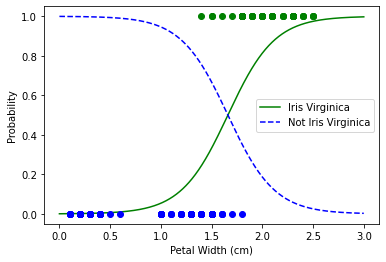

In [4]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # get array len 1000 from 0-3
Y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, Y_proba[:, 1], "g-", label="Iris Virginica")
plt.plot(X_new, Y_proba[:, 0], "b--", label="Not Iris Virginica")

# get indexes of iris virginica and not iris virginica
iv_index = np.concatenate(np.transpose(np.nonzero(y == 1))).ravel()
not_iv_index = np.concatenate(np.transpose(np.nonzero(y == 0))).ravel()

# get X subarray with indexes 
X_is_iv = np.concatenate(X[iv_index])
X_not_iv = np.concatenate(X[not_iv_index])

# plot data points (green is iris virginica, blue is everything else)
plt.plot(X_is_iv, y[iv_index], 'o', color='g')
plt.plot(X_not_iv, y[not_iv_index], 'o', color='b')

# formatting
plt.legend();
plt.ylabel("Probability")
plt.xlabel("Petal Width (cm)")

You can see there is some overlap between not iris virginica and iris virginica

Above 2.0cm the classifier is highly confident that the flower is Iris Virginica (it outputs a high probability for), while below 1cm, it is highly confident that it is not an Iris Virginica. Inbetween these extremes, the classifier is unsure. However if you ask it to predict the class (using the `predict()` rather than the `predict_proba()`) it will return whichever class is most likely. Therefore, there is a `decision boundary` at around 1.6cm where both possibilities are equal to 50%. This means that if the pertal width is higher than 1.6cm, the classifier will predict that the flower is an Iris virginica, and otherwise it will predict not (even if it is not very confident)

In [5]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly without having to train and combine multiple binary classifiers. This is called Softmax Regression. The idea is when given an instance x, the softmax regression model first computes a score $s_k(x)$ for each class k, then estimates the probability of each class by applying the softmax function to the scores. The equation to compute $s_k(x)$ is:

$s_k(x) = (\theta^k)^T x$

Note that each class has its own dedicated parameter vector $\theta^k$. All these vectors are typically stored as rows in a parameter matrix $\Theta$

Once you have computed the score of every class for the instance x, you can estimate the probability $p_k$ that the instance belongs to class k by running the scores through the softmax function. The function computes the exponential of every score, then normalises them (dividing by the sum of all the exponentials). The scores a regenerally called logits. The softmax equation is

$p_k = \sigma(s(x))_k = \frac{exp(s_k(x))}{\sum_{j=1}^{K} exp(s_j(x))}$

In this equation:
- K is the number of classes.
- s(x) is a vector containing the scores of each class for the instance x
- $\sigma(s(x))_k$ is the estimated probability that the instance x belongs to class k, given the scores of each class for that instance

Softmax predicts the class with the highest estimated probability. Note: this classifier only predicts one class at a time, it is multiclass not multioutput

To train this model, our objective is to have a model that estimates a high probability for the target class. Minimizing the cost function (shown below) called the cross entropy, should lead to this objective because it penalizes the model when it estimates a low probability for a target class. Cross entropy is frequently used to measure howo well a set of estimated class probabilities matches the target class

$J(\Theta) = -\frac{1}{n}\sum_{i=1}^{m}\sum_{k=1}^{K}y_k^ilog(p_k^i)$